In [1]:
using Pkg
# Pkg.add("DataFrames")
# Pkg.add("CSV")

In [2]:
using DataFrames
using Statistics
using CSV
using Dates

ENV["COLUMNS"] = 120

120

In [3]:
include("../pricing/Pricing.jl")

Main.Pricing

In [4]:
df = DataFrame(CSV.read("data/spx_options_2017.csv"))

,underlying,underlying_last,optionroot,type,expiration,quotedate,strike,last,bid,ask,volume
,String,Float64,String,String,Date,Date,Float64,Float64,Float64,Float64,Int64
1,SPX,2257.83,SPX170120C00100000,call,2017-01-20,2017-01-03,100.0,2161.5,2154.3,2158.7,0
2,SPX,2257.83,SPX170120C00200000,call,2017-01-20,2017-01-03,200.0,2060.95,2054.4,2058.8,0
3,SPX,2257.83,SPX170120C00300000,call,2017-01-20,2017-01-03,300.0,1960.45,1954.4,1958.8,0
4,SPX,2257.83,SPX170120C00400000,call,2017-01-20,2017-01-03,400.0,1760.55,1854.6,1858.9,0
5,SPX,2257.83,SPX170120C00500000,call,2017-01-20,2017-01-03,500.0,1749.33,1754.6,1758.9,0
6,SPX,2257.83,SPX170120C00550000,call,2017-01-20,2017-01-03,550.0,1699.43,1704.7,1709.0,0
7,SPX,2257.83,SPX170120C00600000,call,2017-01-20,2017-01-03,600.0,0.0,1654.7,1658.9,0
8,SPX,2257.83,SPX170120C00650000,call,2017-01-20,2017-01-03,650.0,0.0,1604.7,1609.0,0
9,SPX,2257.83,SPX170120C00700000,call,2017-01-20,2017-01-03,700.0,1435.6,1554.7,1559.0,0


In [5]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,underlying,,SPX,,SPXW,3,,String
2,underlying_last,2451.16,2257.83,2437.03,2690.21,,,Float64
3,optionroot,,SPX170120C00100000,,SPXW181231P03200000,60877,,String
4,type,,call,,put,2,,String
5,expiration,,2017-01-03,,2020-12-18,197,,Date
6,quotedate,,2017-01-03,,2017-12-29,251,,Date
7,strike,2109.5,100.0,2220.0,3800.0,,,Float64
8,last,70.8103,0.0,0.76,2592.34,,,Float64
9,bid,215.921,0.0,42.9,2587.1,,,Float64


In [6]:
df.dte = df.expiration - df.quotedate;

# Calls

#### Result 1: Relative Pricing under Distribution for $S$

$$C(K_2) = \left(\frac{K_2}{K_1}\right)^{1-\alpha} C(K_1)$$

The function *call_price_gen* takes $C(K_1)$, $K_1$, $S_0$, and $\alpha$ as input and returns a function $K_2 \mapsto C(K_2)$ that predicts the price of a certain call contract with strike price $K_2$.

In [7]:
predictor =  Pricing.call_price_gen(2000.0, 1800.0, 2.0, 3.0)
predictor(2200.0)

1338.301591073364

*calls_otm* takes the data, an OTM percentage and a day of the year and returns a DataFrame with all the >10% OTM calls for that day.

In [8]:
# First day's calls (10% OTM)
calls = Pricing.calls_otm(df, 10, Date("2017-01-03"));

The resulting dataframe has an added column *K*, with the strike prices as a $\%$ of the spot price $S_0$.

In [9]:
first(calls, 5).K

5-element Array{Float64,1}:
 110.72578537799569
 111.83304323177565
 112.94030108555559
 114.04755893933556
 115.15481679311551

We sort by the number of contracts per `dte` level:

In [10]:
Pricing.contracts_per_dte(calls)

,dte,N
,Day,Int64
1,17 days,18
2,381 days,18
3,164 days,16
4,255 days,16
5,346 days,14
6,717 days,14
7,528 days,10
8,73 days,7
9,45 days,2


We set `dte = 381 days` and find the contract with the highest volume to set `K_1`

In [11]:
using Dates
using Plots
gr(size=(600,400))

Plots.GRBackend()

In [12]:
subset_calls = filter(x -> x.dte == Day(381), calls)
(_volume, idx) = findmax(subset_calls.volume)

(1, 7)

In [13]:
anchor = subset_calls[idx, :]

,underlying,underlying_last,optionroot,type,expiration,quotedate,strike,last,bid,ask,volume
,String,Float64,String,String,Date,Date,Float64,Float64,Float64,Float64,Int64
7,SPX,2257.83,SPX180119C02700000,call,2018-01-19,2017-01-03,2700.0,6.5,5.7,7.3,1


With a given anchor, the OTM calls and a choice of $\alpha$, *plot_call_prediction* will plot the prices predicted by the model versus the market values.

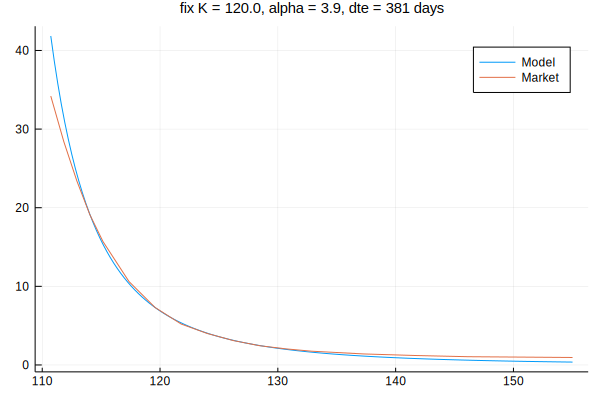

In [14]:
Pricing.plot_call_prediction(calls, anchor, 3.9)

Next, we'll plot different combinations for $\alpha$ and `dte`.

In [15]:
# Pkg.add("VegaLite");
using VegaLite;

*plot_call_predictions* takes the data from a given day, a list of different dtes, a range of values for $\alpha$ and a function that picks the anchor.

In [16]:
# Chooses the contract with the highest volume
anchor_pick(calls) = calls[findmax(calls.volume)[2], :]

anchor_pick (generic function with 1 method)

In [17]:
dtes = [Day(73), Day(164), Day(381)];
α_range = range(2.2, 3.0, length=4);

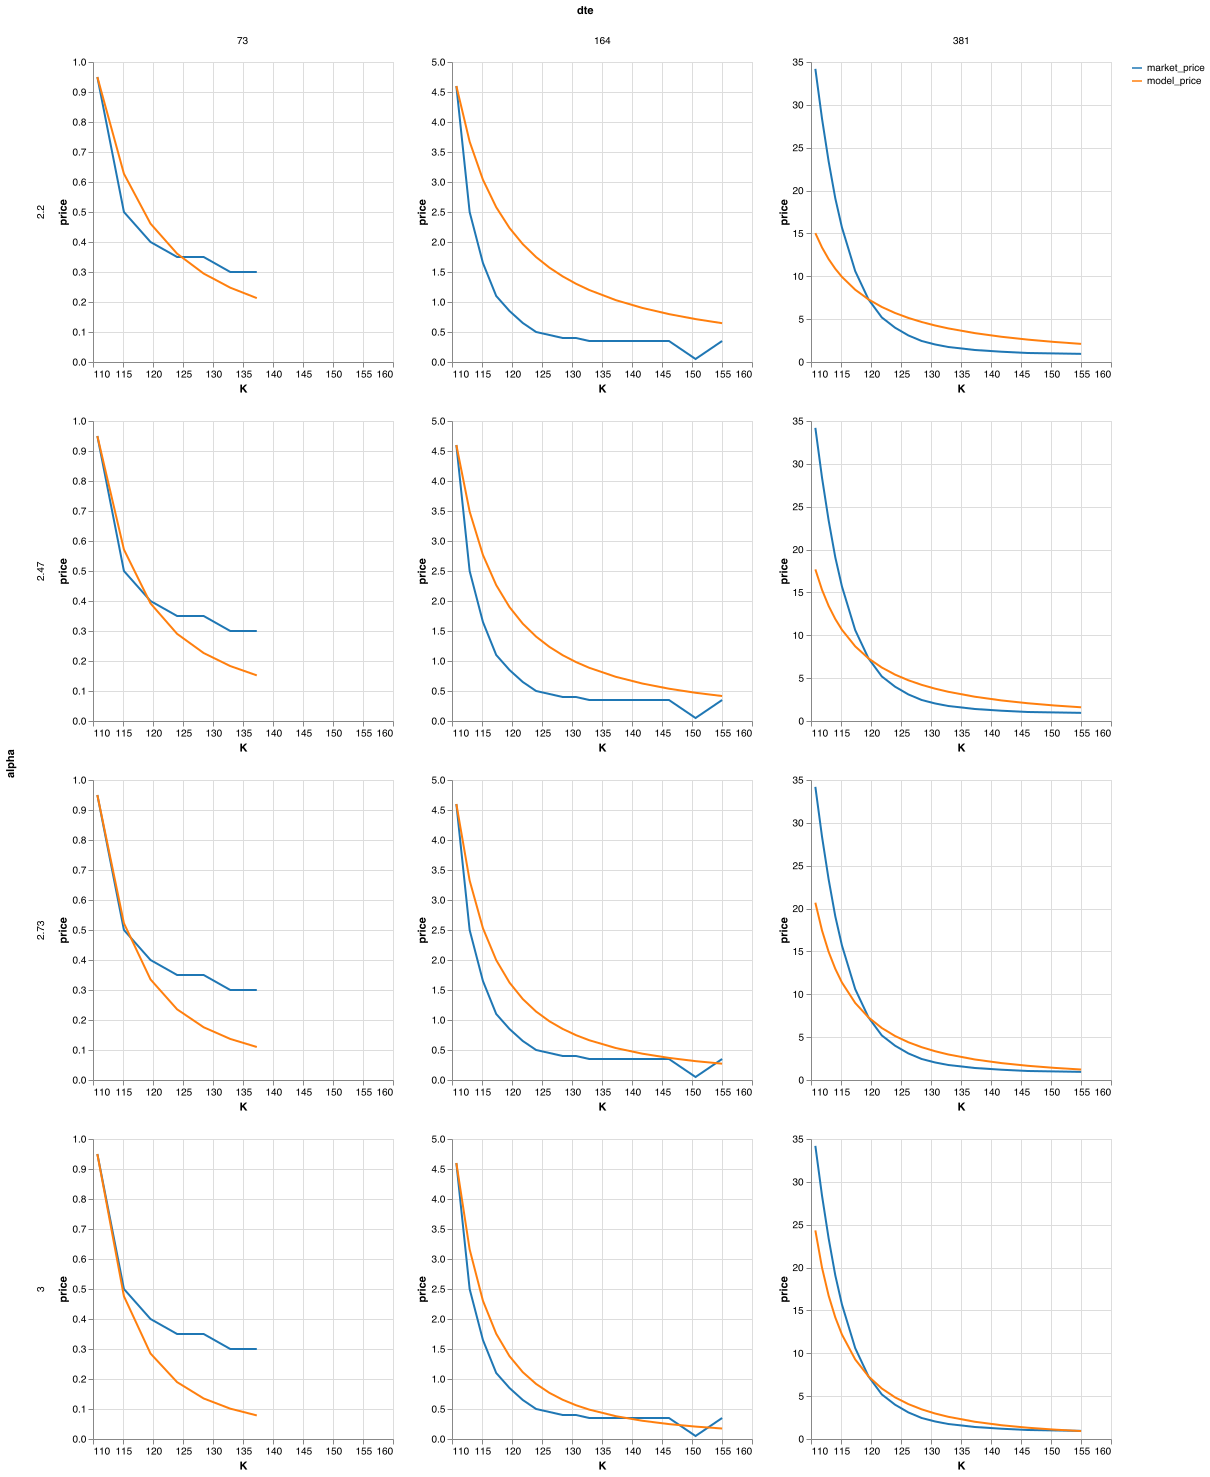

In [18]:
Pricing.plot_call_predictions(calls, dtes, α_range, anchor_pick)

# Puts

#### Result 3: Put Pricing

$$P(K_2) = \frac{(-1)^{1-\alpha} S_0^{-\alpha} ((\alpha - 1) K_2 + S_0) - (K_2 - S_0)^{1 - \alpha}}{(-1)^{1-\alpha} S_0^{-\alpha} ((\alpha - 1) K_1 + S_0) - (K_1 - S_0)^{1 - \alpha}} P(K_1)$$

The function *put_price_gen* works the same way as *call_price_gen*.

In [19]:
predictor =  Pricing.put_price_gen(1600.0, 1800.0, 2.0, 3.0)
predictor(1200.0)

1066.9627967023173

In [20]:
# First day's puts (10% OTM)
puts = Pricing.puts_otm(df, 10, Date("2017-01-03"));

In [21]:
Pricing.contracts_per_dte(puts)

,dte,N
,Day,Int64
1,17 days,167
2,45 days,104
3,717 days,61
4,346 days,60
5,381 days,60
6,255 days,56
7,164 days,54
8,528 days,54
9,73 days,52


In [28]:
# Chooses the contract with the highest volume
anchor_pick(puts) = puts[findmax(puts.volume)[2], :]

anchor_pick (generic function with 1 method)

In [22]:
dtes = [Day(45), Day(164), Day(346)];
α_range = range(2.2, 3.0, length=4);

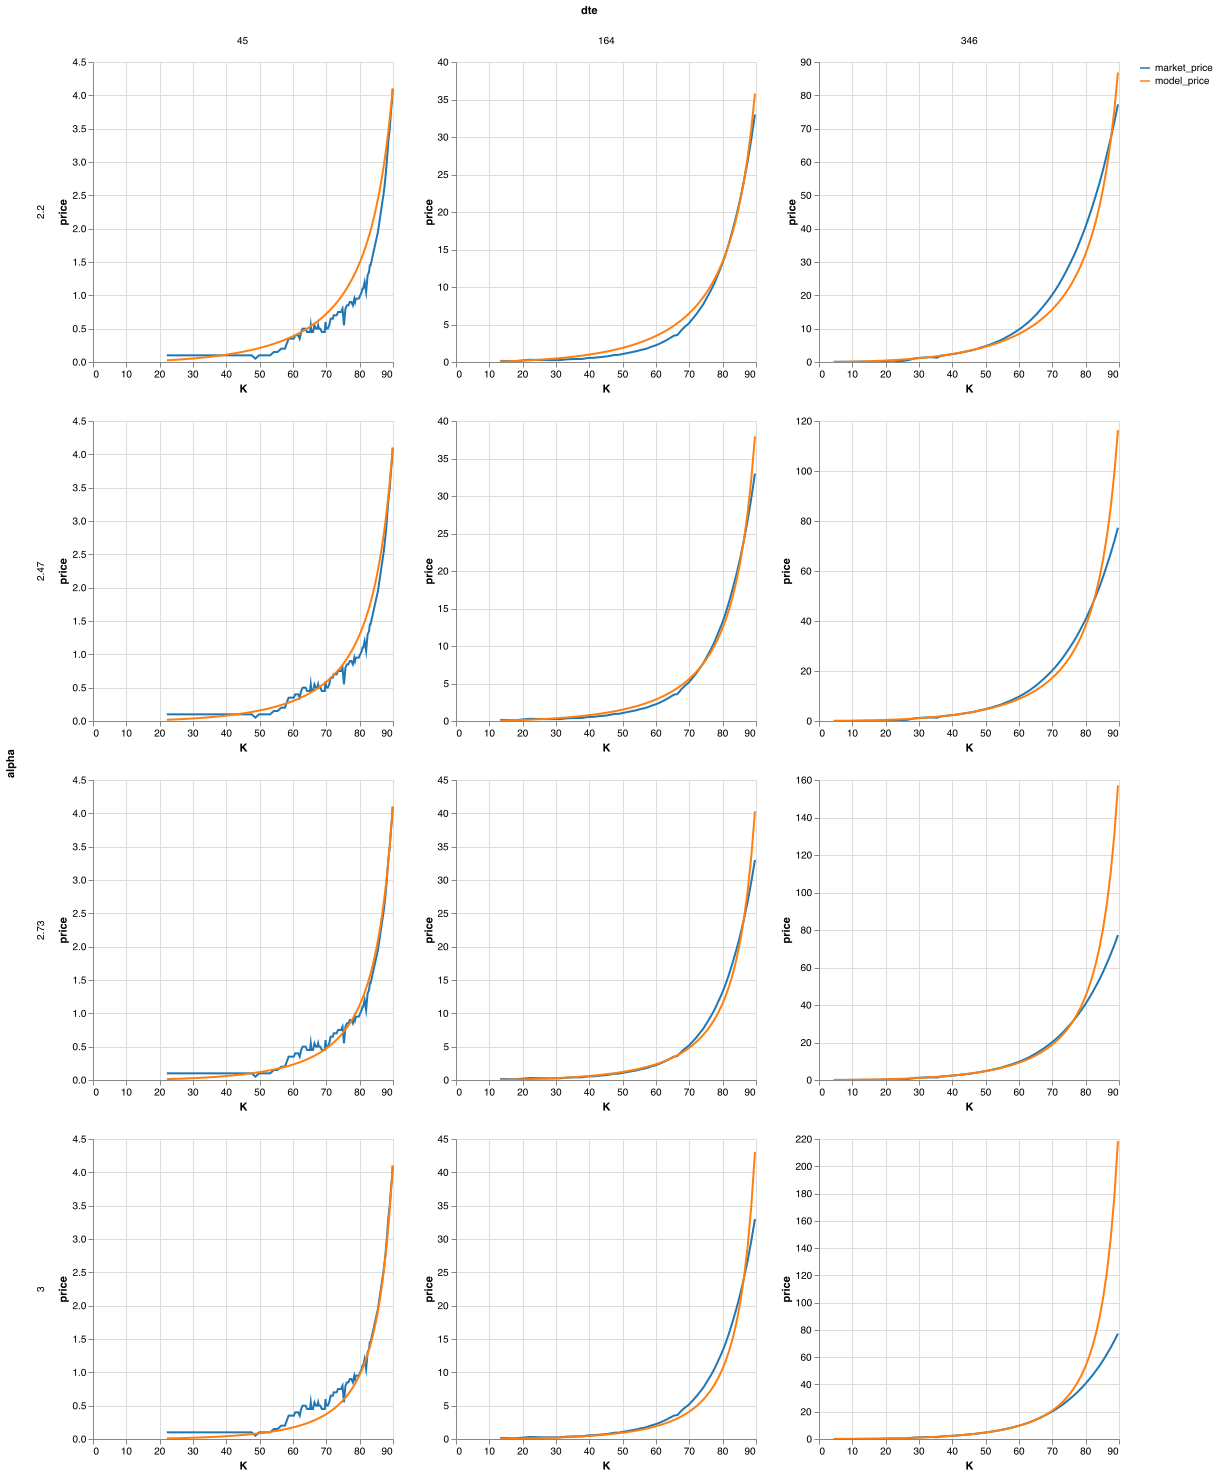

In [23]:
Pricing.plot_put_predictions(puts, dtes, α_range, anchor_pick)